In [1]:
import xgboost as xgb
from sklearn.metrics import precision_score, recall_score, accuracy_score
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, roc_auc_score


#https://towardsdatascience.com/a-beginners-guide-to-xgboost-87f5d4c30ed7

In [2]:
fingerprint_df = pd.read_csv("~/GitHub/ML-assignments/Assignment-1/final_dataset_v1.csv")
fingerprint_df

,fingerprint,minutia,r15,r30,r45,r60,r75,r90,l1,l2,...,beta7r,beta8,beta8r,beta9,beta9r,beta10,beta10r,beta11,beta11r,score_change
0,B101X9I_1_1,v0,0,1,3,8,10,11,1,2,...,32.000000,77.000000,-70.716815,56.000000,-49.716815,284.000000,-277.716815,-5.716815,12.000000,0
1,B101X9I_1_1,v1,0,0,3,4,5,9,0,3,...,-99.716815,2.000000,4.283185,81.000000,-74.716815,297.000000,-290.716815,69.000000,-62.716815,0
2,B101X9I_1_1,v2,0,1,1,1,3,3,1,0,...,-289.716815,140.000000,-133.716815,1.000000,5.283185,80.000000,-73.716815,68.000000,-61.716815,1
3,B101X9I_1_1,v3,1,3,5,7,8,9,2,2,...,-288.716815,4.283185,2.000000,181.000000,-174.716815,-14.716815,21.000000,5.283185,1.000000,1
4,B101X9I_1_1,v4,0,1,1,1,1,3,1,0,...,-306.716815,157.000000,-150.716815,18.000000,-11.716815,97.000000,-90.716815,85.000000,-78.716815,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5236,U300X2I_1_1,v13,0,0,2,4,8,12,0,2,...,-209.716815,217.000000,-210.716815,30.000000,-23.716815,-105.716815,112.000000,5.000000,1.283185,0
5237,U300X2I_1_1,v14,2,3,5,9,10,13,1,2,...,-190.716815,182.000000,-175.716815,222.000000,-215.716815,4.283185,2.000000,169.000000,-162.716815,0
5238,U300X2I_1_1,v15,1,2,3,6,9,12,1,1,...,-175.716815,197.000000,-190.716815,222.000000,-215.716815,169.000000,-162.716815,4.283185,2.000000,1
5239,U300X2I_1_1,v16,0,1,5,12,14,17,1,4,...,-217.716815,-97.716815,104.000000,-6.716815,13.000000,13.000000,-6.716815,225.000000,-218.716815,0


In [3]:
X = fingerprint_df.iloc[:,: 2:-1]
y = fingerprint_df.iloc[:,-1]




In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# In order for XGBoost to be able to use our data,
# we’ll need to transform it into a specific format that XGBoost can handle.
D_train = xgb.DMatrix(X_train,label=y_train)
D_test = xgb.DMatrix(X_test,label=y_test)



In [5]:
param = {
    'eta': 0.3, 
    'max_depth': 3,  
    'objective': 'multi:softprob',  
    'num_class': 2} 

steps = 20  # The number of training iterations

In [6]:
model = xgb.train(param, D_train, steps)


In [8]:
preds = model.predict(D_test)

best_preds = np.asarray([np.argmax(line) for line in preds])



In [10]:
XBG_auc = roc_auc_score(y_test, best_preds)
fpr, tpr, _ = roc_curve(y_test, best_preds)


In [11]:
print('XGB: AUROC = %.3f' % (XBG_auc))


XGB: AUROC = 1.000


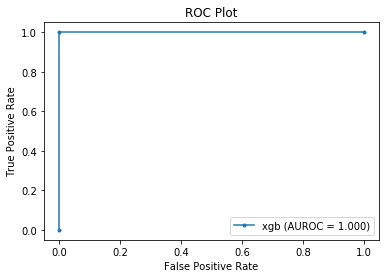

In [12]:
plt.plot(fpr, tpr, marker='.', label='xgb (AUROC = %0.3f)' % XBG_auc)

# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()

In [8]:
print("Precision = {}".format(precision_score(y_test, best_preds, average='macro')))
print("Recall = {}".format(recall_score(y_test, best_preds, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, best_preds)))

Precision = 1.0
Recall = 1.0
Accuracy = 1.0


In [ ]:
clf = xgb.XGBClassifier()
parameters = {
     "eta"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
     "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
     "min_child_weight" : [ 1, 3, 5, 7 ],
     "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
     "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
     }

grid = GridSearchCV(clf,
                    parameters,
                    n_jobs=4,
                    scoring="neg_log_loss",
                    cv=3)

grid.fit(X_train, y_train)